# **Transformações de Perspectiva**

#### **Nesta lição, aprenderemos:**
1. Usar o getPerspectiveTransform do OpenCV
2. Usar o findContours para obter os cantos e automatizar a transformação de perspectiva


In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

def imshow(image = None, size = 10):
    h, w = image.shape[0], image.shape[1]
    aspect_ratio = h/w
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

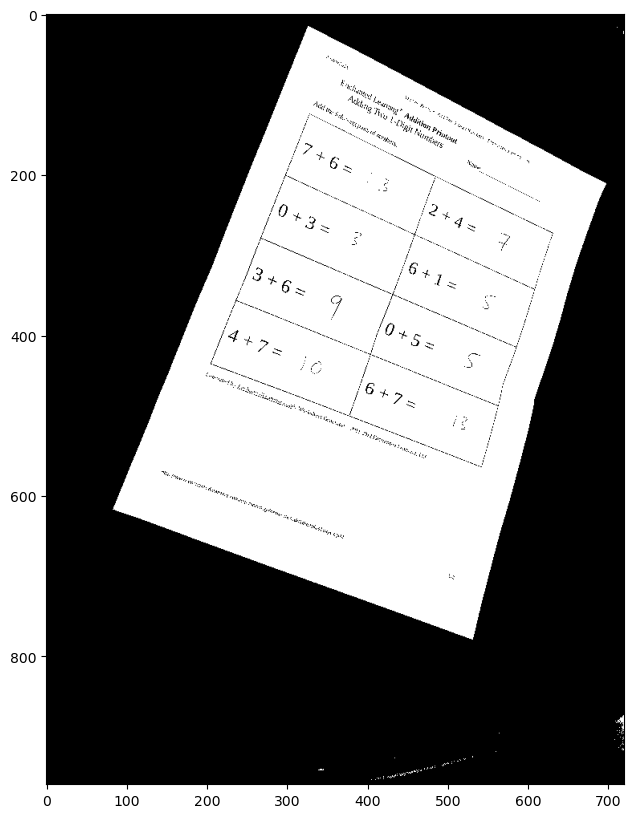

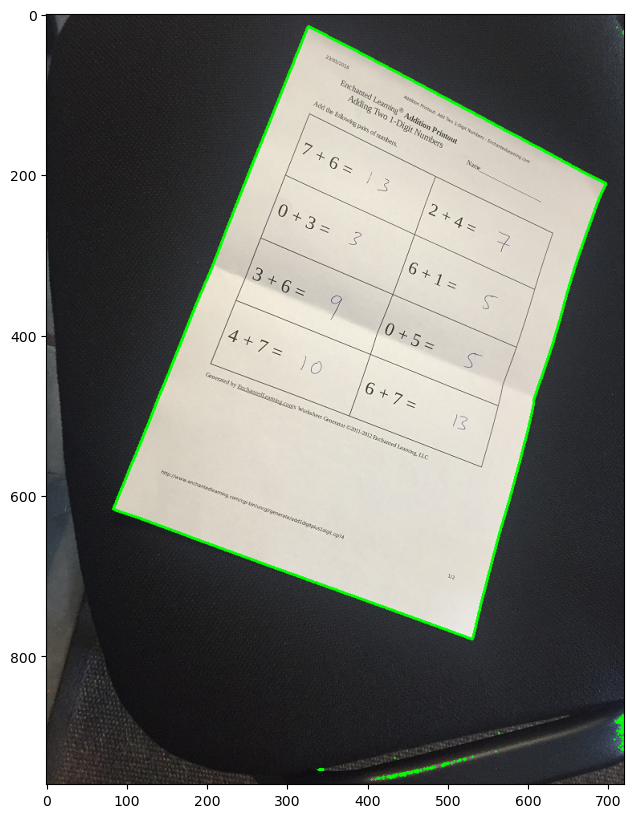

54


In [2]:
image = cv2.imread('images/scan.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow(th2)

contours, hierarchy = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow(image)

print(len(contours))

### **Aproximar nosso contorno acima para apenas 4 pontos usando approxPolyDP**



In [3]:

sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

for cnt in sorted_contours:
	perimeter = cv2.arcLength(cnt, True)
	approx = cv2.approxPolyDP(cnt, 0.05 * perimeter, True)
 
	if len(approx) == 4:
		break

print("4 Pontos")
print(approx)



4 Pontos
[[[326  15]]

 [[ 83 617]]

 [[531 779]]

 [[697 211]]]


### **Usar getPerspectiveTransform e warpPerspective para criar nossa visualização de cima para baixo**


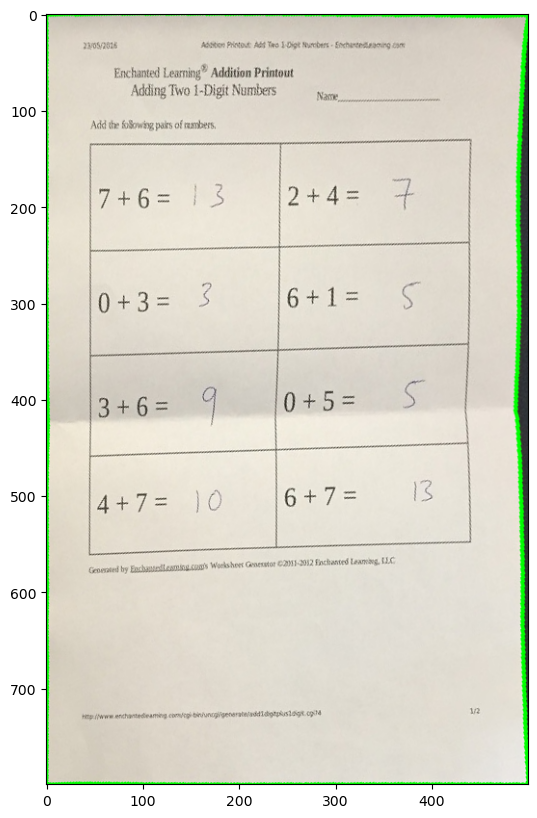

In [5]:

inputPts = np.float32(approx)

outputPts = np.float32([[0,0],
                       [0,800],
                       [500,800],
                       [500,0]])

M = cv2.getPerspectiveTransform(inputPts,outputPts)

dst = cv2.warpPerspective(image, M, (500,800))

imshow(dst)

### **Excercise**

1. Order points in ```approx``` sorting from top left going clockwise (i.e. top left, top right, bottom left, bottom right)
2. Get initial contour aspect ratio and adjust final Warp to output in that aspect ratio and orientation